## ****Importing Necessary Libraries****

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt


In [29]:
!pip install visualkeras

     |████████████████████████████████| 795 kB 1.2 MB/s eta 0:00:01


# ****Loading the Dataset****

In [24]:
train_data=pd.read_csv('../input/gtsrb-german-traffic-sign/Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

print(train_data.head())
print()
print('NO. of classes')
print(train_data['label'].nunique())

   Width  Height  label                            path
0     27      26     20  Train/20/00020_00000_00000.png
1     28      27     20  Train/20/00020_00000_00001.png
2     29      26     20  Train/20/00020_00000_00002.png
3     28      27     20  Train/20/00020_00000_00003.png
4     28      26     20  Train/20/00020_00000_00004.png

NO. of classes
43


In [12]:
data = []
labels = []
classes = 43
cur_path = '../input/gtsrb-german-traffic-sign/Train'
for i in os.listdir(cur_path):
    dir=cur_path+'/'+i;
    for j in os.listdir(dir):
        img_path=dir+'/'+j;
        image=cv2.imread(img_path,0)
        image=cv2.resize(image,(30,30),interpolation = cv2.INTER_NEAREST)
        data.append(image)
        labels.append(i)
data=np.array(data)
labels=np.array(labels)
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [15]:
#Splitting training and testing dataset
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# ****Visualizing the Data****

In [16]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits',
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

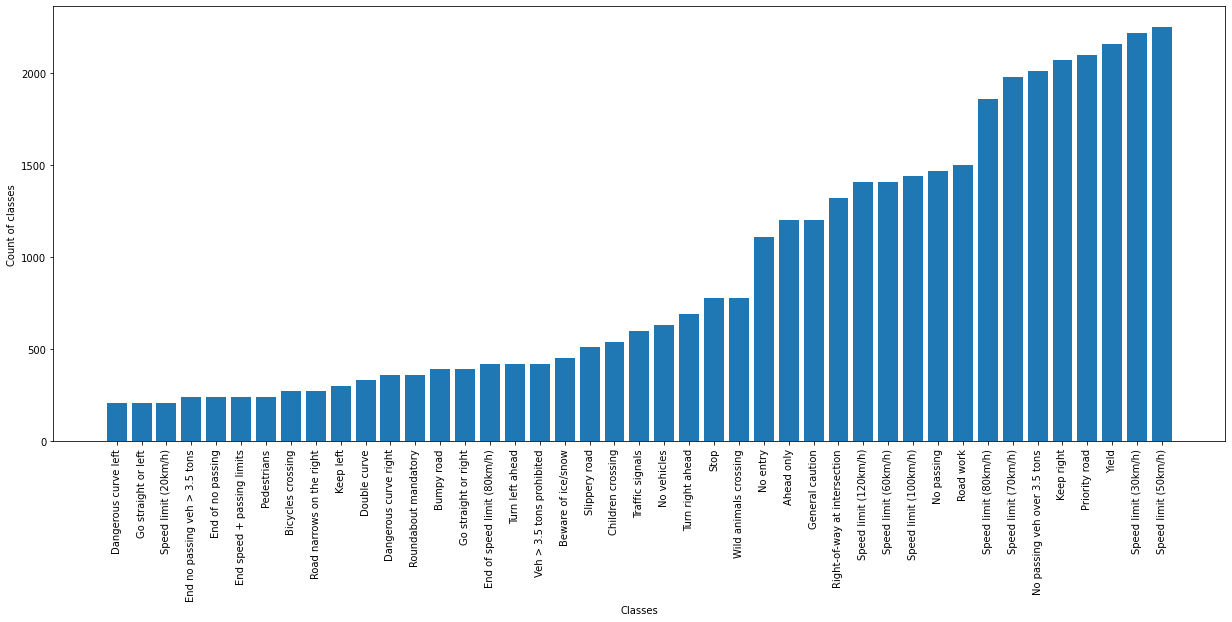

In [21]:
folders=os.listdir(cur_path)
train_num=[]
class_num=[]

for folder in folders:
    train_numbers=os.listdir(cur_path+'/'+folder)
    train_num.append(len(train_numbers))
    class_num.append(classes[int(folder)])

zipped_list=zip(train_num,class_num)
sorted_list=sorted(zipped_list)
tuples=zip(*sorted_list)
train_num,class_num=[list(t) for t in tuples]

plt.figure(figsize=(21,8))
plt.bar(class_num,train_num)
plt.xlabel('Classes')
plt.ylabel('Count of classes')
plt.xticks(class_num,rotation='vertical')
plt.show()

# ****Visualizing 25 random images from test data****

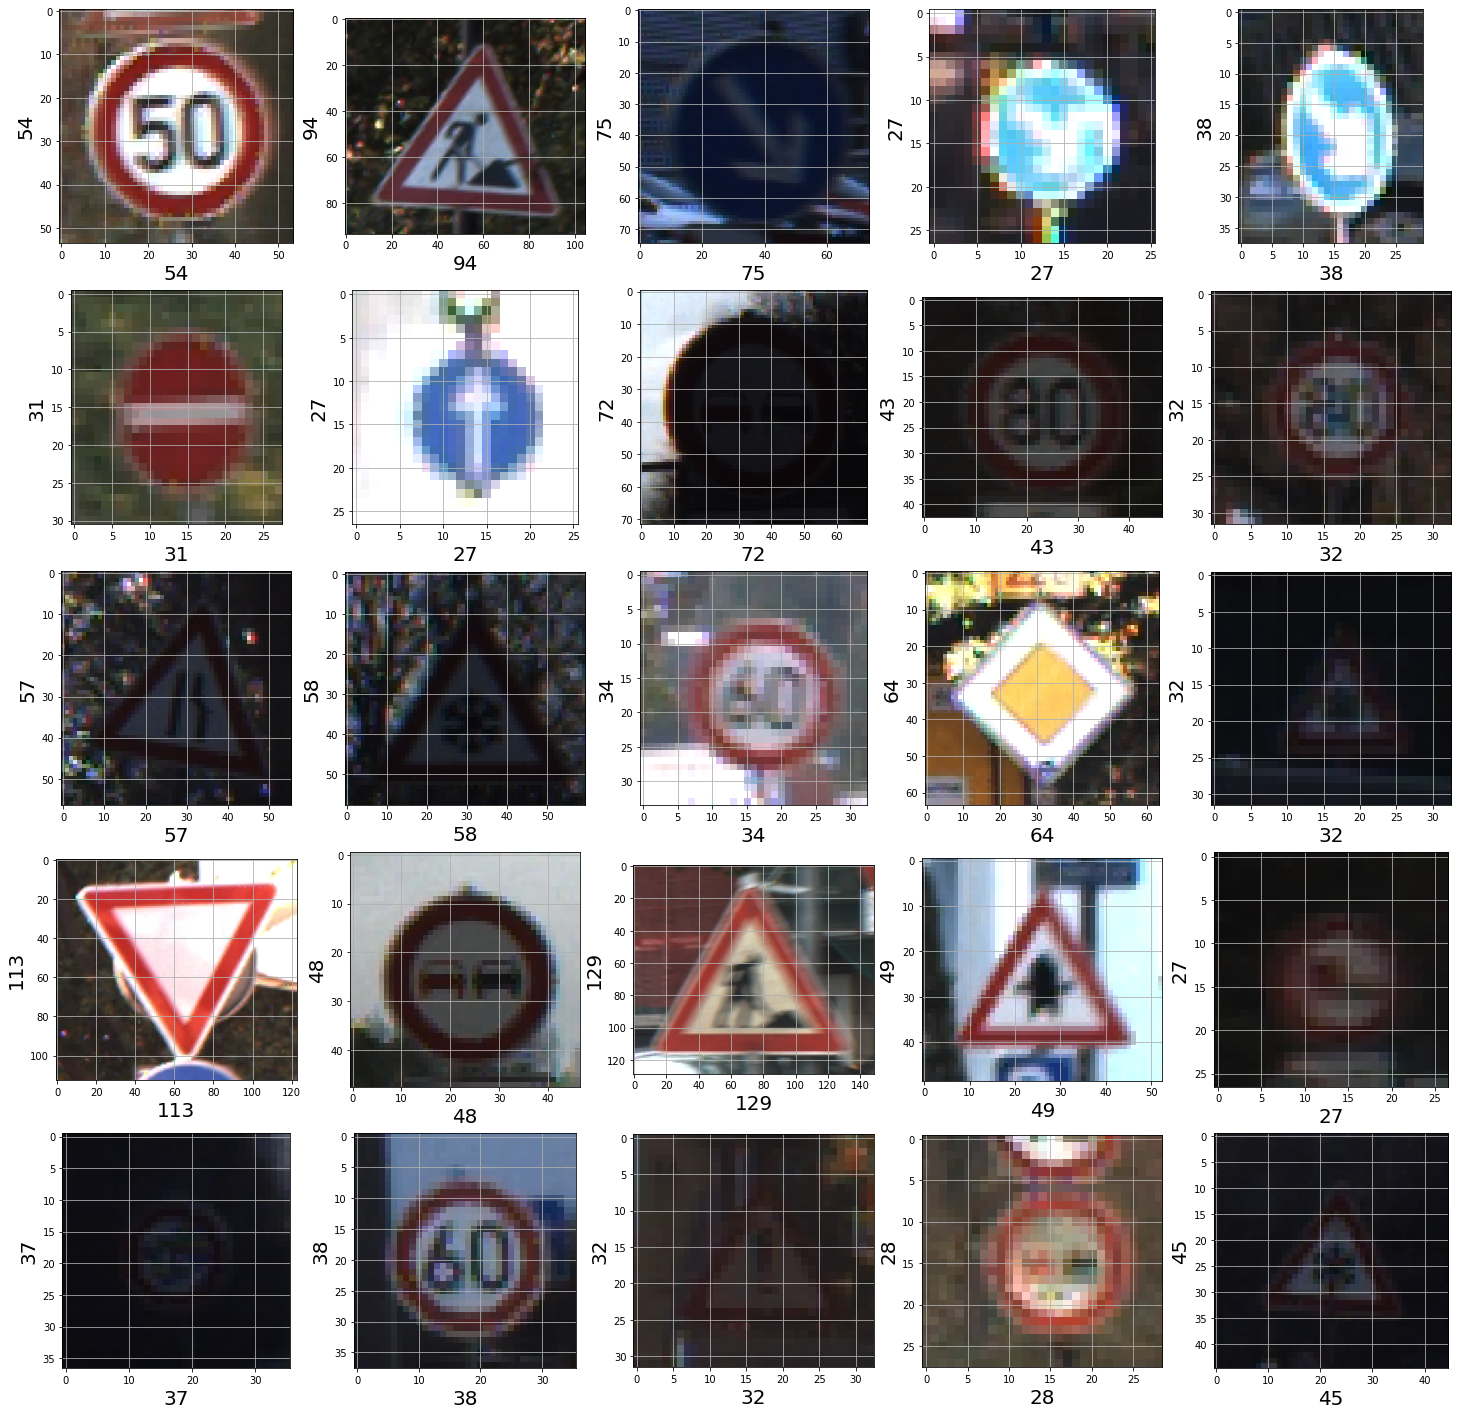

In [25]:
import random
from matplotlib.image import imread
data_dir='../input/gtsrb-german-traffic-sign'
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)
    
    


# ***Model***

## ****Defining our Model****

In [26]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
import tensorflow.keras.layers.experimental.preprocessing as preprocessing
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(30, 30, 3)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(43, activation = "softmax"))


## ****Visualising our Model****

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

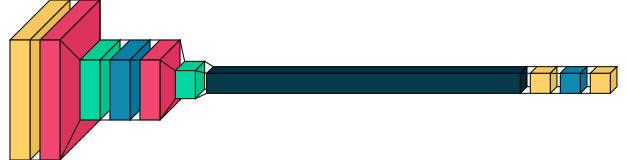

In [30]:
import visualkeras
visualkeras.layered_view(model)

## ****Optimizing our Model****

In [31]:
from keras.optimizers import RMSprop
optimizer =  RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## ****Training our Model****

In [34]:
epochs=10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 7s 4ms/step - loss: 2.5344 - accuracy: 0.3225 - val_loss: 0.4728 - val_accuracy: 0.8562
Epoch 2/10
981/981 [==============================] - 4s 4ms/step - loss: 0.6233 - accuracy: 0.8043 - val_loss: 0.1607 - val_accuracy: 0.9564
Epoch 3/10
981/981 [==============================] - 4s 4ms/step - loss: 0.3265 - accuracy: 0.8988 - val_loss: 0.0856 - val_accuracy: 0.9759
Epoch 4/10
981/981 [==============================] - 4s 4ms/step - loss: 0.2199 - accuracy: 0.9327 - val_loss: 0.0653 - val_accuracy: 0.9819
Epoch 5/10
981/981 [==============================] - 4s 4ms/step - loss: 0.1744 - accuracy: 0.9486 - val_loss: 0.0558 - val_accuracy: 0.9856
Epoch 6/10
981/981 [==============================] - 4s 4ms/step - loss: 0.1499 - accuracy: 0.9549 - val_loss: 0.0483 - val_accuracy: 0.9879
Epoch 7/10
981/981 [==============================] - 4s 4ms/step - loss: 0.1458 - accuracy: 0.9580 - val_loss: 0.4057 - val_accuracy: 0.9351
Epoch 

### Our model got a 96% accuracy on the training dataset and 98% accuracy on Validation dataset. With matplotlib, we plot the graph for accuracy and the loss.

## ****Accuracy and Loss plots****

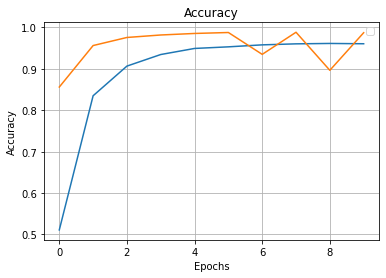

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.legend()
plt.grid(True)

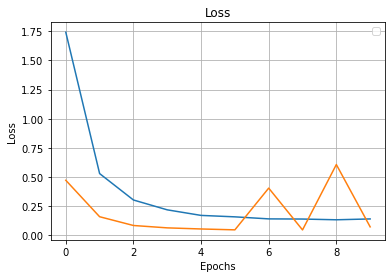

In [36]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.legend()
plt.grid(True)

In [37]:
model.save('traffic_classifier.h5')

In [45]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [55]:
test_labels=test_data['label'].values
test_paths=test_data['path']
test_images=[]
test_dir='../input/gtsrb-german-traffic-sign'
for i in test_paths:
    image=cv2.imread(test_dir+'/'+i)
    image=cv2.resize(image,(30,30),interpolation = cv2.INTER_NEAREST)
    test_images.append(image)
test_images=np.array(test_images)
pred=model.predict_classes(test_images)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels,pred))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9509897070467141


## ****So we achieved a 95% accuracy in this model on Test Data.****